In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

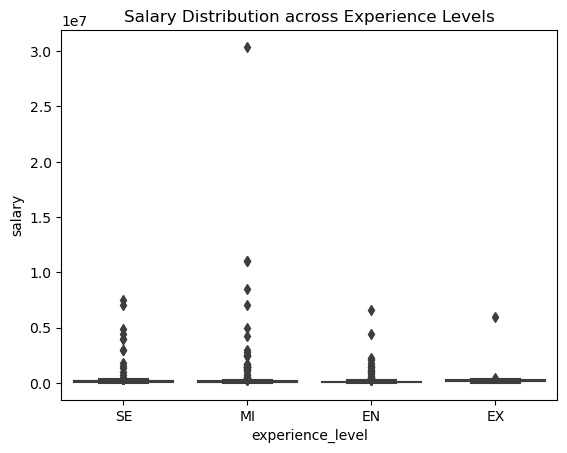

In [12]:
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution across Experience Levels')
plt.show()

In [14]:
df.groupby('employment_type')['salary'].mean().sort_values(ascending=False)

employment_type
FL    288755.500000
FT    211309.339223
CT    113300.000000
PT     79910.823529
Name: salary, dtype: float64

In [15]:
job_title_counts = df['job_title'].value_counts()
job_title_counts

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

In [16]:
job_title_counts.sort_values(inplace=True, ascending=False)
job_title_counts

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Product Data Scientist         1
Staff Data Scientist           1
Principal Data Architect       1
Head of Machine Learning       1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

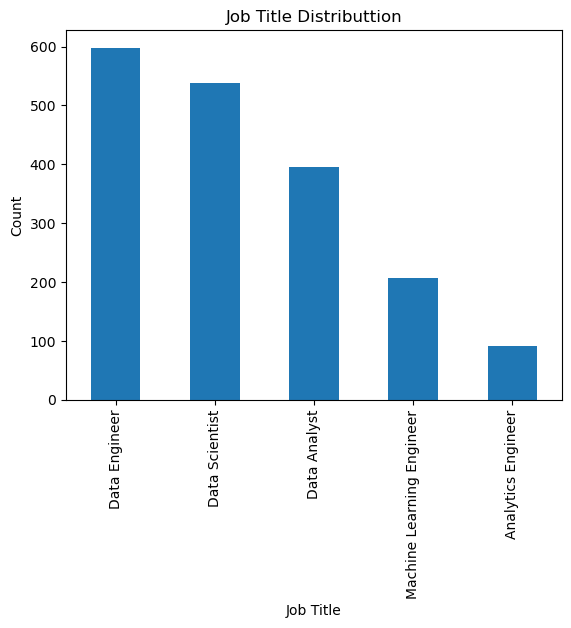

In [17]:
job_title_counts.head().plot(kind='bar')
plt.title('Job Title Distributtion')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

In [20]:
average_salary_by_year = df.groupby('work_year')['salary'].mean()
average_salary_by_year.sort_values(ascending=False)

work_year
2021    547722.754386
2020    378170.786667
2022    177876.830222
2023    164557.867647
Name: salary, dtype: float64

In [21]:
df.groupby('employee_residence')['salary'].median().sort_values(ascending=False)

employee_residence
CL    15252500.0
HU    11000000.0
IL     1500000.0
IN     1342500.0
TH      840000.0
         ...    
MD       18000.0
ID       15000.0
SK       12000.0
MA       10000.0
MK        6000.0
Name: salary, Length: 78, dtype: float64

In [25]:
df.groupby('company_location')['remote_ratio'].mean()

company_location
AE     66.666667
AL     50.000000
AM      0.000000
AR    100.000000
AS     66.666667
         ...    
TH     66.666667
TR     40.000000
UA     37.500000
US     48.548471
VN      0.000000
Name: remote_ratio, Length: 72, dtype: float64

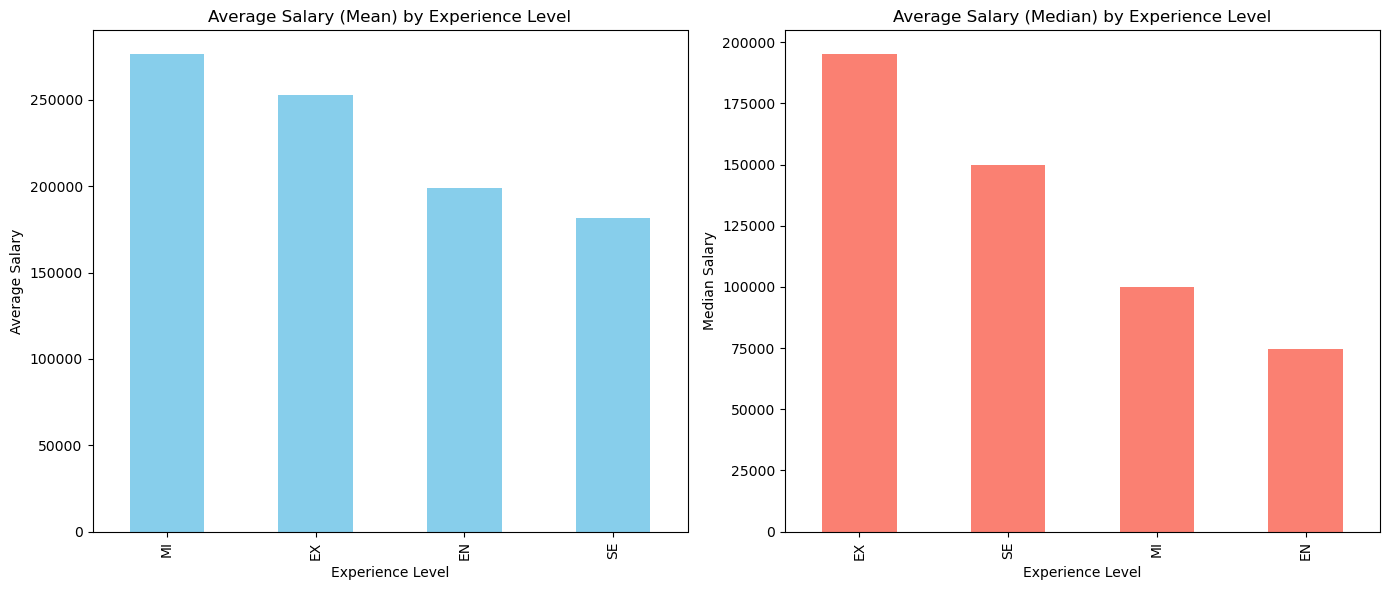

In [31]:
average_salary_by_experience_mean = df.groupby('experience_level')['salary'].mean().sort_values(ascending=False)
average_salary_by_experience_median = df.groupby('experience_level')['salary'].median().sort_values(ascending=False)
fig, axes = plt.subplots(1,2, figsize=(14,6))

average_salary_by_experience_mean.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Average Salary (Mean) by Experience Level')
axes[0].set_xlabel('Experience Level')
axes[0].set_ylabel('Average Salary')

average_salary_by_experience_median.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Average Salary (Median) by Experience Level')
axes[1].set_xlabel('Experience Level')
axes[1].set_ylabel('Median Salary')

plt.tight_layout()
plt.show()


In [32]:
# We can understand thats some outliers influecing the data

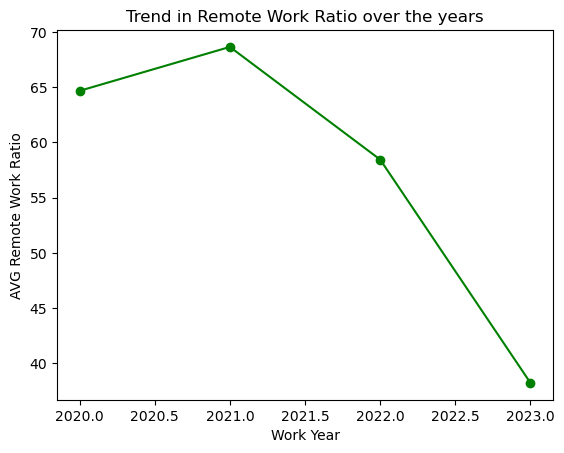

In [33]:
df.groupby('work_year')['remote_ratio'].mean().plot(kind='line', marker='o',color='green')
plt.title('Trend in Remote Work Ratio over the years')
plt.xlabel('Work Year')
plt.ylabel('AVG Remote Work Ratio')
plt.show()

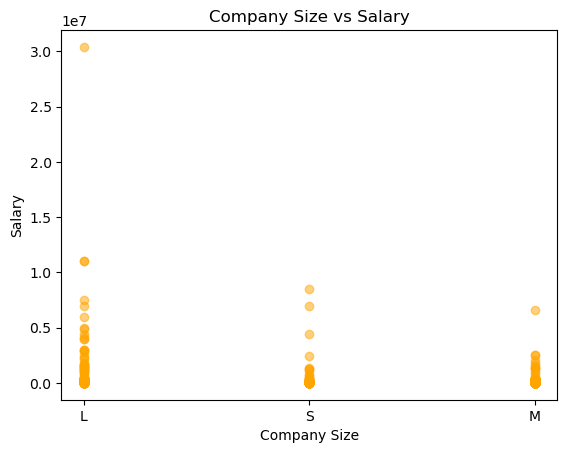

In [36]:
plt.scatter(df['company_size'], df['salary'], alpha=0.5, color='orange')
plt.title('Company Size vs Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

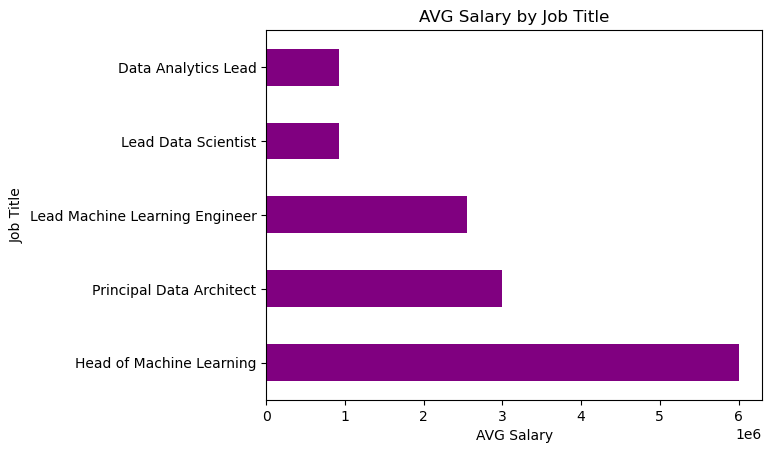

In [40]:
df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head().plot(kind='barh', color='purple')
plt.title('AVG Salary by Job Title')
plt.xlabel('AVG Salary')
plt.ylabel('Job Title')
plt.show()

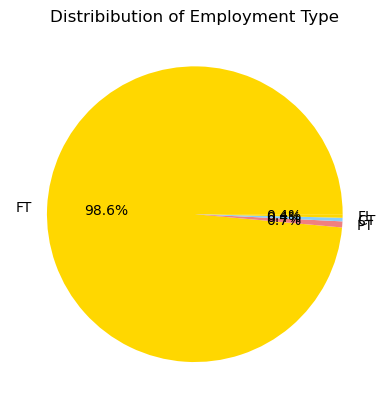

In [42]:
df['employment_type'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['gold','lightcoral','lightskyblue'])
plt.title('Distribibution of Employment Type')
plt.ylabel('')
plt.show()

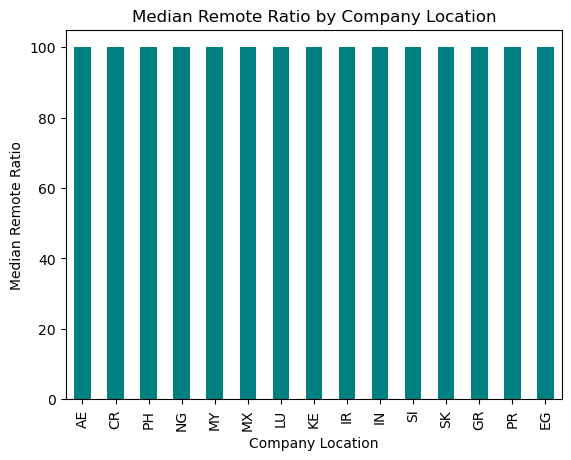

In [44]:
df.groupby('company_location')['remote_ratio'].median().sort_values(ascending=False).head(15).plot(kind='bar', color='teal')
plt.title('Median Remote Ratio by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Median Remote Ratio')
plt.show()

In [45]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [46]:
X = df[['experience_level','employment_type','company_location', 'company_size','employee_residence']]
y = df['salary']

In [47]:
X

,experience_level,employment_type,company_location,company_size,employee_residence
0,SE,FT,ES,L,ES
1,MI,CT,US,S,US
2,MI,CT,US,S,US
3,SE,FT,CA,M,CA
4,SE,FT,CA,M,CA
...,...,...,...,...,...
3750,SE,FT,US,L,US
3751,MI,FT,US,L,US
3752,EN,FT,US,S,US
3753,EN,CT,US,L,US


In [48]:
from sklearn import preprocessing
labelenconder = preprocessing.LabelEncoder()
X['experience_level'] = labelenconder.fit_transform(X['experience_level'])
X['employment_type'] = labelenconder.fit_transform(X['employment_type'])
X['company_location'] = labelenconder.fit_transform(X['company_location'])
X['company_size'] = labelenconder.fit_transform(X['company_size'])
X['employee_residence'] = labelenconder.fit_transform(X['employee_residence'])

/var/folders/_v/2hybkpqd5wg40tj8mx05d6ww0000gn/T/ipykernel_68921/1440104261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['experience_level'] = labelenconder.fit_transform(X['experience_level'])
/var/folders/_v/2hybkpqd5wg40tj8mx05d6ww0000gn/T/ipykernel_68921/1440104261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['employment_type'] = labelenconder.fit_transform(X['employment_type'])
/var/folders/_v/2hybkpqd5wg40tj8mx05d6ww0000gn/T/ipykernel_68921/1440104261.py:5: SettingWithCopyWarning: 
A

In [49]:
X

,experience_level,employment_type,company_location,company_size,employee_residence
0,3,2,25,0,26
1,2,0,70,2,75
2,2,0,70,2,75
3,3,2,12,1,11
4,3,2,12,1,11
...,...,...,...,...,...
3750,3,2,70,0,75
3751,2,2,70,0,75
3752,0,2,70,2,75
3753,0,0,70,0,75


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [52]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def modelresults(predictions):
    print('Mean absolute error on model is {}'.format(mean_absolute_error(y_test,predictions)))
    print('Root mean squared error on model is {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)
predLR = lr.predict(scaled_X_test)
modelresults(predLR)

Mean absolute error on model is 165679.29888790398
Root mean squared error on model is 575205.447404046
